# Here is an implementation of KNN in an image compression example.

Take an image and compress it in the sense that you only need the mean of the specified clusters and the labels for each pixel. If you for example take the image of a lollipop and find two clusters, it will compress the image into an image with the same shape but only two colors. It will basically reduce the file size of an image by removing a certain amount of colors.

Note: This is using my own code for KNN, so it is much less efficient than the one already existing in sklearn.

In [1]:
%%capture
#'import' the methods from the k-means notebook
%run K-means.ipynb

In [2]:
##Imports
from skimage import io
import os
from skimage.transform import rotate
import warnings; warnings.simplefilter('ignore')
import pylab as pb

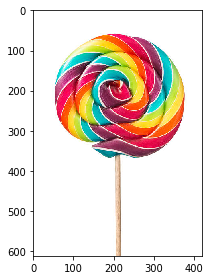

In [3]:
#load image
imgName = 'pictures/lollipop.jpg'
image = io.imread(imgName);
io.imshow(image);
io.show();

#save the image size
vertical = image.shape[0];
horizontal = image.shape[1];

#change into big matrix with each row being a pixel and each column being RGB value
imgShaped = image.reshape(vertical*horizontal,3)

 68%|██████████████████████████████████████████████▉                      | 34/50 [00:21<00:10,  1.58it/s]


early stopping



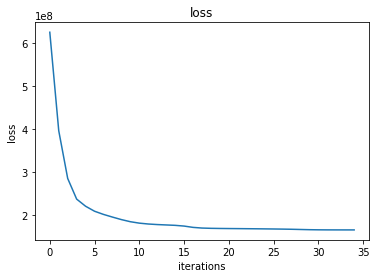

In [4]:
#Learning k-means, set clusters and other paramters
clusters = 10;
dim = 3;
spread = 400;
meanInit = getInitialMeanGuesses(dim=3,meanSpread=spread,nrOfClusters=clusters)

#does the learning
newMean,J=KNN(imgShaped,meanInit,tolerance=0.0001,maxIter=50)
#gives each pixel a label
labelPixels = (findClosestCluster(imgShaped,newMean))

#Save them for size comparison
io.imsave('pictures/labeledPixels.jpg',(labelPixels.reshape(vertical,horizontal)).astype(np.uint8))
np.save('pictures/clusterMeans.npy',newMean) 

pb.plot(J[1:])
pb.title("loss")
pb.xlabel("iterations")
pb.ylabel("loss")
pb.show()

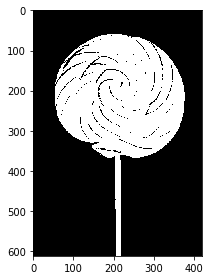

In [5]:
##PLotting black and white, works best if only 2 clusters (since it's only 2 colors)

labelPixels = labelPixels.astype(np.uint8)
labeledImage = (imgShaped*labelPixels);

#set all nonzero terms to white
labeledImage[np.sum(labeledImage,1)>0]=[255,255,255]

labeledImage = labeledImage.reshape(vertical,horizontal,3)

io.imshow(labeledImage)
io.show()

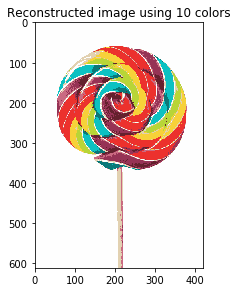

In [6]:
## plots in different colors, one for each cluster
reconstructedImage = np.zeros((vertical,horizontal,3));

labelPixels = labelPixels;
labelPixels = labelPixels.reshape(vertical,horizontal);

#set each pixel to it's cloest cluster mean
for i in range(vertical):
    for j in range(horizontal):
        reconstructedImage[i,j,:] = newMean[labelPixels[i,j],:]

io.imshow(reconstructedImage.astype(np.uint8));
io.imsave('pictures/reconstructedImage.jpg',reconstructedImage.astype(np.uint8))
pb.title("Reconstructed image using {} colors".format(clusters))
io.show()

# Below you can check the difference in file size of the original and the compressed image.

In [8]:
originalSize = os.path.getsize(imgName)
reconstructedSize = os.path.getsize("pictures/reconstructedImage.jpg")
compressedSize = os.path.getsize("pictures/labeledPixels.jpg")+os.path.getsize("clusterMeans.npy")

printList = [originalSize,reconstructedSize,compressedSize];

print("      Orignal size: " + repr(originalSize) + " b")
print("Reconstructed size: " + repr(reconstructedSize) + " b")
print("   Compressed size: " + repr(compressedSize) + " b")


      Orignal size: 35399 b
Reconstructed size: 30936 b
   Compressed size: 5914 b


# Below are some reconstructed images
These are images taken from my phone camera, which has a significantly higher amount of pixels.
The calculations took quite a while using my implementation of KNN (it needs to be optimized), so I have merely saved the results and show them here.

Only the reconsted pictures size is compared to the original, the compressed one would be much smaller.

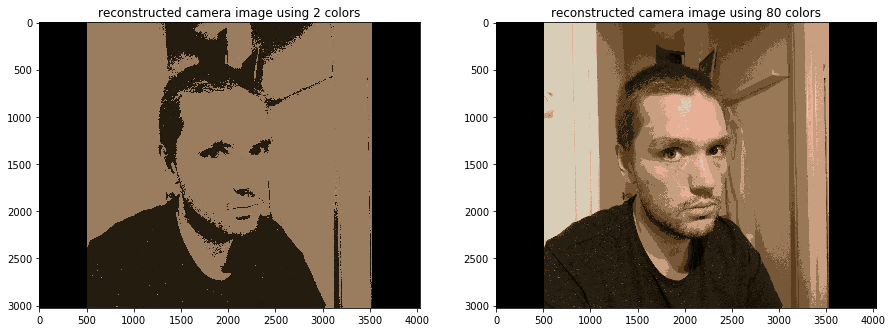

               Orignal size: 3222604 b
Reconstructed 2  color size: 563767  b
Reconstructed 80 color size: 928349  b


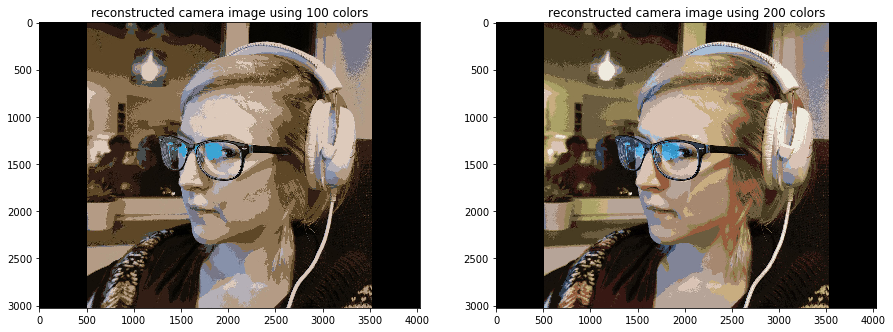

               Orignal size: 3497451 b
Reconstructed 2  color size: 1118920  b
Reconstructed 80 color size: 1176851  b


In [9]:
imgName1 = 'savedReconstructuredPictures/faceReconstructed2colors.jpg'
image1 = io.imread(imgName1);

imgName2 = 'savedReconstructuredPictures/faceReconstructed80colors.jpg'
image2 = io.imread(imgName2);

fig, ax = pb.subplots(1,2,figsize=(15, 10))

ax[0].imshow(rotate(image1,-90));
ax[0].set_title("reconstructed camera image using 2 colors")
ax[1].imshow(rotate(image2,-90));
ax[1].set_title("reconstructed camera image using 80 colors")
io.show();

originalSize = os.path.getsize("pictures/face.jpg")
reconstructedSize1 = os.path.getsize("savedReconstructuredPictures/faceReconstructed2colors.jpg")
reconstructedSize2 = os.path.getsize("savedReconstructuredPictures/faceReconstructed80colors.jpg")

printList = [originalSize,reconstructedSize,compressedSize];

print("               Orignal size: " + repr(originalSize) + " b")
print("Reconstructed 2  color size: " + repr(reconstructedSize1) + "  b")
print("Reconstructed 80 color size: " + repr(reconstructedSize2) + "  b")

#--------------------------------------------

imgName3 = 'savedReconstructuredPictures/faceReconstructed100colors.jpg'
image3 = io.imread(imgName3);

imgName4 = 'savedReconstructuredPictures/faceReconstructed200colors.jpg'
image4 = io.imread(imgName4);

fig, ax = pb.subplots(1,2,figsize=(15, 10))

ax[0].imshow(rotate(image3,-90));
ax[0].set_title("reconstructed camera image using 100 colors")
ax[1].imshow(rotate(image4,-90));
ax[1].set_title("reconstructed camera image using 200 colors")
io.show();

originalSize = os.path.getsize("pictures/therese.jpg")
reconstructedSize1 = os.path.getsize("savedReconstructuredPictures/faceReconstructed100colors.jpg")
reconstructedSize2 = os.path.getsize("savedReconstructuredPictures/faceReconstructed200colors.jpg")

printList = [originalSize,reconstructedSize,compressedSize];

print("               Orignal size: " + repr(originalSize) + " b")
print("Reconstructed 2  color size: " + repr(reconstructedSize1) + "  b")
print("Reconstructed 80 color size: " + repr(reconstructedSize2) + "  b")